# 2.1

In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_histogram
from numpy.random import randint

In [2]:
q = QuantumRegister(3)
q_swap = QuantumRegister(2)
c = ClassicalRegister(2)
c_swap = ClassicalRegister(1)
circuit = QuantumCircuit(q, q_swap, c, c_swap)

theta = 0.8
phi = 1.3

circuit.u3(theta, phi, 0, q[0])
circuit.h(q[2])
circuit.cnot(q[2], q[1])

circuit.cnot(q[0], q[1])
circuit.h(q[0])

circuit.measure(q[0], c[0])
circuit.measure(q[1], c[1])

circuit.x(q[2]).c_if(c[1], 1)
circuit.z(q[2]).c_if(c[0], 1)

# ==================================================

circuit.u3(theta, phi, 0, q_swap[0])
circuit.h(q_swap[1])
circuit.cswap(q_swap[1], q[2], q_swap[0])
circuit.h(q_swap[1])
circuit.x(q_swap[1])
circuit.measure(q_swap[1], c_swap[0])

circuit.draw()

C:\Users\User\AppData\Local\Temp\ipykernel_31772\1946674578.py:10: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  circuit.u3(theta, phi, 0, q[0])
C:\Users\User\AppData\Local\Temp\ipykernel_31772\1946674578.py:25: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  circuit.u3(theta, phi, 0, q_swap[0])


┌───────────────┐          ┌───┐┌─┐                                     »
q0_0: ┤ U3(0.8,1.3,0) ├───────■──┤ H ├┤M├─────────────────────────────────────»
      └───────────────┘┌───┐┌─┴─┐└┬─┬┘└╥┘                                     »
q0_1: ─────────────────┤ X ├┤ X ├─┤M├──╫──────────────────────────────────────»
            ┌───┐      └─┬─┘└───┘ └╥┘  ║    ┌───┐       ┌───┐                 »
q0_2: ──────┤ H ├────────■─────────╫───╫────┤ X ├───────┤ Z ├─────X───────────»
      ┌─────┴───┴─────┐            ║   ║    └─╥─┘       └─╥─┘     │           »
q1_0: ┤ U3(0.8,1.3,0) ├────────────╫───╫──────╫───────────╫───────X───────────»
      └─────┬───┬─────┘            ║   ║      ║           ║       │ ┌───┐┌───┐»
q1_1: ──────┤ H ├──────────────────╫───╫──────╫───────────╫───────■─┤ H ├┤ X ├»
            └───┘                  ║   ║ ┌────╨─────┐┌────╨─────┐   └───┘└───┘»
c0: 2/═════════════════════════════╩═══╩═╡ c0_1=0x1 ╞╡ c0_0=0x1 ╞═════════════»
                                   1   0 └──────────┘└──────────┘             »
c1: 1/════════════════════════════════════════════════════════════════════════»
                                                                              »
«         
«q0_0: ───
«         
«q0_1: ───
«         
«q0_2: ───
«         
«q1_0: ───
«      ┌─┐
«q1_1: ┤M├
«      └╥┘
«c0: 2/═╬═
«       ║ 
«c1: 1/═╩═
«       0

{'1 11': 75, '1 01': 61, '1 10': 53, '1 00': 67}


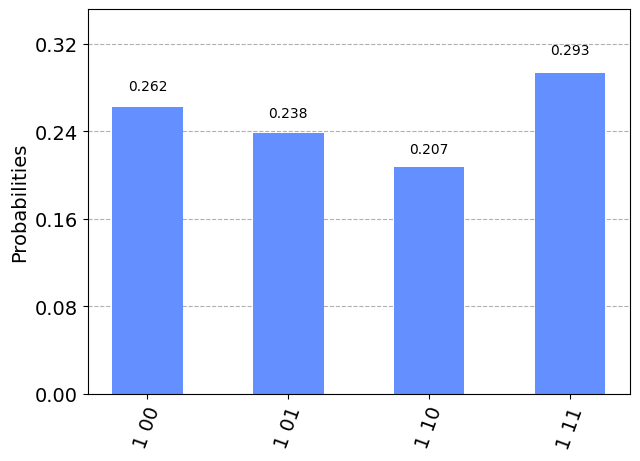

In [3]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=256, memory=True) # memory=True
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# 2.2

In [4]:
q = QuantumRegister(4)
c = ClassicalRegister(2)
c_test = ClassicalRegister(2)
c_reverse = ClassicalRegister(2)
circuit = QuantumCircuit(q, c, c_test)
circuit_rev = QuantumCircuit(q, c, c_reverse)

In [5]:
circuit.h(q[1])
circuit.cnot(q[1], q[0])
circuit.h(q[3])
circuit.cnot(q[3], q[2])
circuit.cnot(q[1], q[2])
circuit.h(q[1])
circuit.measure(q[1], c[0])
circuit.measure(q[2], c[1])
circuit.x(q[3]).c_if(c[1], 1)
circuit.z(q[3]).c_if(c[0], 1)

circuit.measure(q[0], c_test[0])
circuit.measure(q[3], c_test[1])

circuit.draw()

┌───┐     ┌─┐                                   
q25_0: ─────┤ X ├─────┤M├───────────────────────────────────
       ┌───┐└─┬─┘     └╥┘┌───┐┌─┐                           
q25_1: ┤ H ├──■────■───╫─┤ H ├┤M├───────────────────────────
       └───┘┌───┐┌─┴─┐ ║ └┬─┬┘└╥┘                           
q25_2: ─────┤ X ├┤ X ├─╫──┤M├──╫────────────────────────────
       ┌───┐└─┬─┘└───┘ ║  └╥┘  ║    ┌───┐       ┌───┐    ┌─┐
q25_3: ┤ H ├──■────────╫───╫───╫────┤ X ├───────┤ Z ├────┤M├
       └───┘           ║   ║   ║    └─╥─┘       └─╥─┘    └╥┘
                       ║   ║   ║ ┌────╨─────┐┌────╨─────┐ ║ 
 c2: 2/════════════════╬═══╩═══╩═╡ c2_1=0x1 ╞╡ c2_0=0x1 ╞═╬═
                       ║   1   0 └──────────┘└──────────┘ ║ 
 c3: 2/════════════════╩══════════════════════════════════╩═
                       0                                  1

{'00 01': 26, '00 10': 39, '11 01': 35, '00 11': 37, '11 00': 21, '00 00': 43, '11 10': 31, '11 11': 24}


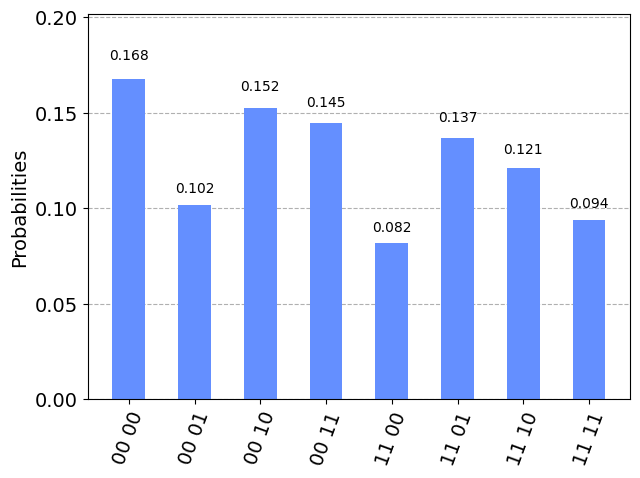

In [6]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=256, memory=True) # memory=True
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [7]:
circuit_rev.h(q[1])
circuit_rev.cnot(q[1], q[0])
circuit_rev.h(q[3])
circuit_rev.cnot(q[3], q[2])
circuit_rev.cnot(q[1], q[2])
circuit_rev.h(q[1])
circuit_rev.measure(q[1], c[0])
circuit_rev.measure(q[2], c[1])
circuit_rev.x(q[3]).c_if(c[1], 1)
circuit_rev.z(q[3]).c_if(c[0], 1)

circuit_rev.cnot(q[3], q[0])
circuit_rev.h(q[3])
circuit_rev.measure(q[0], c_reverse[0])
circuit_rev.measure(q[3], c_reverse[1])

circuit_rev.draw()

┌───┐                                     ┌───┐     ┌─┐   
q25_0: ─────┤ X ├─────────────────────────────────────┤ X ├─────┤M├───
       ┌───┐└─┬─┘     ┌───┐┌─┐                        └─┬─┘     └╥┘   
q25_1: ┤ H ├──■────■──┤ H ├┤M├──────────────────────────┼────────╫────
       └───┘┌───┐┌─┴─┐└┬─┬┘└╥┘                          │        ║    
q25_2: ─────┤ X ├┤ X ├─┤M├──╫───────────────────────────┼────────╫────
       ┌───┐└─┬─┘└───┘ └╥┘  ║    ┌───┐       ┌───┐      │  ┌───┐ ║ ┌─┐
q25_3: ┤ H ├──■─────────╫───╫────┤ X ├───────┤ Z ├──────■──┤ H ├─╫─┤M├
       └───┘            ║   ║    └─╥─┘       └─╥─┘         └───┘ ║ └╥┘
                        ║   ║ ┌────╨─────┐┌────╨─────┐           ║  ║ 
 c2: 2/═════════════════╩═══╩═╡ c2_1=0x1 ╞╡ c2_0=0x1 ╞═══════════╬══╬═
                        1   0 └──────────┘└──────────┘           ║  ║ 
 c4: 2/══════════════════════════════════════════════════════════╩══╩═
                                                                 0  1

{'00 01': 51, '00 11': 75, '00 00': 77, '00 10': 53}


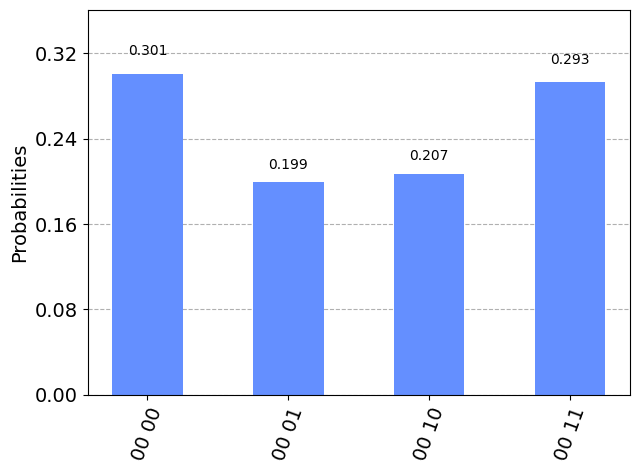

In [8]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit_rev, simulator, shots=256, memory=True) # memory=True
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)